c:\Users\Cao Tuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


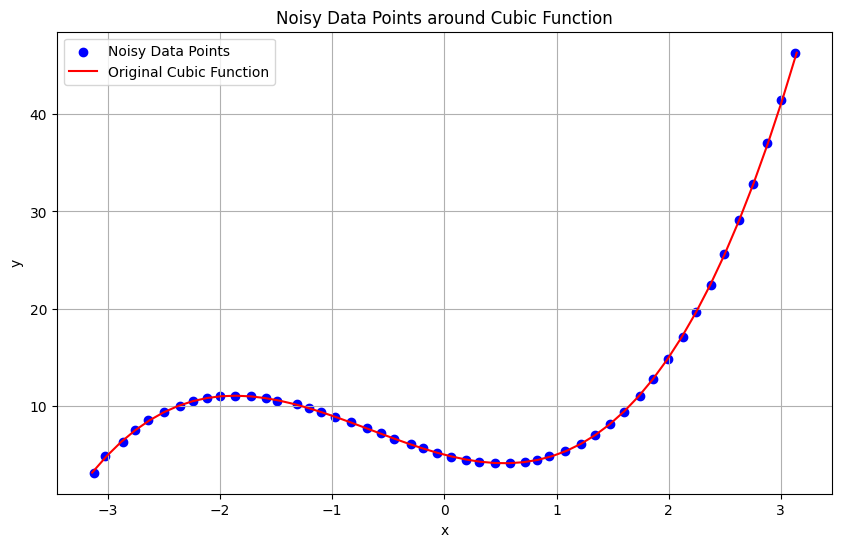

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import math
import numpy as np
import matplotlib.pyplot as plt
import optuna


p4 = 0
p3 = 1
p2 = 2
p1 = -3
p0 = 5

def poly(x):
    return p4*x**4 + p3*x**3 + p2*x**2 + p1*x + p0


def data_generator(data_size=20, noise_std=0.1):
    x = torch.linspace(-math.pi, math.pi, steps=data_size)
    cubic_y = poly(x)

    noisy_x = x + torch.randn_like(x) * noise_std
    noisy_y = cubic_y + torch.randn_like(cubic_y) * noise_std


    return noisy_x, noisy_y, x, cubic_y

noisy_x, noisy_cubic_y, x_normal, y_normal = data_generator(data_size=50, noise_std=0.01)


plt.figure(figsize=(10, 6))
plt.scatter(noisy_x.numpy(), noisy_cubic_y.numpy(), label='Noisy Data Points', color='blue')
plt.plot(x_normal.numpy(), y_normal.numpy(), label='Original Cubic Function', color='red')
plt.title('Noisy Data Points around Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import matplotlib.pyplot as plt

# Define your model
class LinearRegression3Layer(nn.Module):
    def __init__(self):
        super(LinearRegression3Layer, self).__init__()
        self.hidden1 = nn.Linear(1, 5)
        self.hidden2 = nn.Linear(5, 5)
        self.hidden3 = nn.Linear(5, 5)
        self.output = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Define the objective function
def objective(trial):
    # Suggest learning rate
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    
    # Suggest number of epochs
    num_epochs = trial.suggest_int('num_epochs', 100, 1000)

    # Create model
    model = LinearRegression3Layer()

    # Define loss function
    loss_fnc = nn.MSELoss()

    # Define optimizer with suggested learning rate
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        outputs = model(noisy_x.unsqueeze(1))
        loss = loss_fnc(outputs, noisy_cubic_y.unsqueeze(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Return the final validation loss
    return loss.item()

# Define the noisy data points
# (Assuming 'noisy_x' and 'noisy_cubic_y' are already defined)

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_lr = study.best_params['lr']
best_epochs = study.best_params['num_epochs']
print("Best learning rate:", best_lr)
print("Best number of epochs:", best_epochs)

# Re-train the model with the best hyperparameters
best_model = LinearRegression3Layer()
optimizer = optim.Adam(best_model.parameters(), lr=best_lr)
loss_fnc = nn.MSELoss()

for epoch in range(best_epochs):
    outputs = best_model(noisy_x.unsqueeze(1))
    loss = loss_fnc(outputs, noisy_cubic_y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(noisy_x.numpy(), noisy_cubic_y.numpy(), label='Noisy Data Points', color='blue')

with torch.no_grad():
    predicted_y = best_model(noisy_x.unsqueeze(1)).numpy()
    plt.plot(x_normal.numpy(), predicted_y, label='Predicted Function', color='green')

plt.title('Noisy Data Points around Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression Model with Three Hidden Layers

### Model Architecture
This model is statically created with three hidden layers followed by an output layer. Each hidden layer is fully connected with a specified number of nodes.

- **Input Layer:** The input layer has one node, representing the input feature (x).
- **Hidden Layers:** There are three hidden layers, each transforming the input through linear transformations followed by rectified linear unit (ReLU) activation functions.
- **Output Layer:** The output layer is a single node (y) as the result of the task.


In [ ]:
class LinearRegression3Layer(nn.Module):
    def __init__(self):
        super(LinearRegression3Layer, self).__init__()
        self.hidden1 = nn.Linear(1, 5)
        self.hidden2 = nn.Linear(5, 5)
        self.hidden3 = nn.Linear(5, 5)
        self.output = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

### Model Architecture (Dynamic Version with Variable Numbers of Layers)

The dynamic version of the linear regression model introduces flexibility in the number of hidden layers, allowing it to adapt to different complexities of the data or tasks.

- **Input Layer:** Similar to the static model, the input layer has one node representing the input feature (x).
- **Hidden Layers:** The number of hidden layers is determined by the `num_layers` parameter passed during initialization. Each hidden layer performs a linear transformation followed by ReLU activation, similar to the static model. However, the dynamic aspect here is that the number of hidden layers can vary.
- **Output Layer:** The output layer remains the same, producing a single node (y) as the result of the task.


In [3]:
class DynamicLinearRegression(nn.Module):
    def __init__(self, num_layers):
        super().__init__()
        self.num_layers = num_layers
        self.input = nn.Linear(1, 5) 
        self.hidden_layers = nn.ModuleList([nn.Linear(5, 5) for _ in range(num_layers - 1)])
        self.output = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.input(x))  # Pass through the input layer
        for i, layer in enumerate(self.hidden_layers):
            x = self.hidden_layers[i // 2](x) + layer(x)
        x = self.output(x)
        return x

### Model Architecture (Dynamic Version with Variable Layer Nodes)

The dynamic linear regression model with variable layer nodes enhances the adaptability of the model by allowing customization of the number of nodes in each hidden layer.

- **Input Layer:** The input layer remains consistent, with one node representing the input feature (x).

- **Hidden Layers:** The number of hidden layers is determined by the `num_layers` parameter passed during initialization. Each hidden layer consists of a linear transformation followed by ReLU activation, but the number of nodes in each layer varies based on the `layer_nodes` parameter. This flexibility enables the model to adjust its complexity according to the dataset or task requirements.

- **Output Layer:** Similar to both static and dynamic versions, the output layer produces a single node (y) as the result of the regression task.


In [ ]:
class DynamicLinearRegression(nn.Module):
    def __init__(self, num_layers, layer_nodes):
        super().__init__()
        self.num_layers = num_layers
        self.input = nn.Linear(1, layer_nodes[0]) 
        self.hidden_layers = nn.ModuleList([nn.Linear(layer_nodes[i], layer_nodes[i+1]) for i in range(num_layers - 1)])
        self.output = nn.Linear(layer_nodes[-1], 1)

    def forward(self, x):
        x = torch.relu(self.input(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output(x)
        return x

## Cross-Validation using KFold

In K-Fold cross-validation, the dataset is divided into K subsets, or folds, and the model is trained and evaluated K times, each time using a different fold as the test set and the remaining folds as the training set.

In this code below, 50 datapoints is splitted with K-Fold cross-validation using the `KFold` class from the `sklearn.model_selection` in Python.


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

kf.split(noisy_x)

for i, (train_index, val_index) in enumerate(kf.split(noisy_x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={val_index}")

In [9]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class DynamicLinearRegression(nn.Module):
    def __init__(self, num_layers, layer_nodes):
        super().__init__()
        self.num_layers = num_layers
        self.input = nn.Linear(1, layer_nodes[0])  # Separate input layer
        self.hidden_layers = nn.ModuleList([nn.Linear(layer_nodes[i], layer_nodes[i+1]) for i in range(num_layers - 1)])
        self.output = nn.Linear(layer_nodes[-1], 1)

    def forward(self, x):
        x = torch.relu(self.input(x))  # Pass through the input layer
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output(x)
        return x

# Define the objective function
def objective(trial):
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    num_epochs = trial.suggest_int('num_epochs', 100, 1000)
    num_layers = trial.suggest_int('num_layers', 1, 5)
    layer_nodes = [trial.suggest_int(f'layer_{i}_nodes', 1, 10) for i in range(num_layers)]
    
    kf = KFold(n_splits=5)  # Define 5-fold cross-validation
    
    total_loss = 0.0
    for train_index, val_index in kf.split(noisy_x):
        train_x, train_y = noisy_x[train_index], noisy_cubic_y[train_index]
        val_x, val_y = noisy_x[val_index], noisy_cubic_y[val_index]

        model = DynamicLinearRegression(num_layers, layer_nodes)
        loss_fnc = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        for _ in range(num_epochs):
            outputs = model(train_x.unsqueeze(1))
            loss = loss_fnc(outputs, train_y.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            val_outputs = model(val_x.unsqueeze(1))
            val_loss = loss_fnc(val_outputs, val_y.unsqueeze(1))
        
        total_loss += val_loss.item()

    return total_loss / 5  # Average loss over 5 folds



In [ ]:

# Define the noisy data points
# (Assuming 'noisy_x' and 'noisy_cubic_y' are already defined)

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_lr = study.best_params['lr']
best_epochs = study.best_params['num_epochs']
best_num_layers = study.best_params['num_layers']
best_layer_nodes = [study.best_params[f'layer_{i}_nodes'] for i in range(best_num_layers)]
print("Best learning rate:", best_lr)
print("Best number of epochs:", best_epochs)
print("Best number of layers:", best_num_layers)
print("Best number of nodes in each layer:", best_layer_nodes)

# Re-train the model with the best hyperparameters
best_model = DynamicLinearRegression(best_num_layers, best_layer_nodes)
optimizer = optim.Adam(best_model.parameters(), lr=best_lr)
loss_fnc = nn.MSELoss()

for epoch in range(best_epochs):
    outputs = best_model(noisy_x.unsqueeze(1))
    loss = loss_fnc(outputs, noisy_cubic_y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(noisy_x.numpy(), noisy_cubic_y.numpy(), label='Noisy Data Points', color='blue')

with torch.no_grad():
    predicted_y = best_model(noisy_x.unsqueeze(1)).numpy()
    plt.plot(x_normal.numpy(), predicted_y, label='Predicted Function', color='green')

plt.title('Noisy Data Points around Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
    total_loss = 0.0
    for train_index, val_index in kf.split(noisy_x):
        train_x, train_y = noisy_x[train_index], noisy_cubic_y[train_index]
        val_x, val_y = noisy_x[val_index], noisy_cubic_y[val_index]

        model = DynamicLinearRegression(num_layers, layer_nodes)
        loss_fnc = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        for _ in range(num_epochs):
            outputs = model(train_x.unsqueeze(1))
            loss = loss_fnc(outputs, train_y.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            val_outputs = model(val_x.unsqueeze(1))
            val_loss = loss_fnc(val_outputs, val_y.unsqueeze(1))
        
        total_loss += val_loss.item()

    return total_loss / 5  # Average loss over 5 folds


# Define the noisy data points
# (Assuming 'noisy_x' and 'noisy_cubic_y' are already defined)

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_lr = study.best_params['lr']
best_epochs = study.best_params['num_epochs']
best_num_layers = study.best_params['num_layers']
best_layer_nodes = [study.best_params[f'layer_{i}_nodes'] for i in range(best_num_layers)]
print("Best learning rate:", best_lr)
print("Best number of epochs:", best_epochs)
print("Best number of layers:", best_num_layers)
print("Best number of nodes in each layer:", best_layer_nodes)

# Re-train the model with the best hyperparameters
best_model = DynamicLinearRegression(best_num_layers, best_layer_nodes)
optimizer = optim.Adam(best_model.parameters(), lr=best_lr)
loss_fnc = nn.MSELoss()

for epoch in range(best_epochs):
    outputs = best_model(noisy_x.unsqueeze(1))
    loss = loss_fnc(outputs, noisy_cubic_y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(noisy_x.numpy(), noisy_cubic_y.numpy(), label='Noisy Data Points', color='blue')

with torch.no_grad():
    predicted_y = best_model(noisy_x.unsqueeze(1)).numpy()
    plt.plot(x_normal.numpy(), predicted_y, label='Predicted Function', color='green')

plt.title('Noisy Data Points around Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
study.best_params

{'lr': 0.013900388815415572,
 'num_epochs': 989,
 'num_layers': 5,
 'layer_0_nodes': 8,
 'layer_1_nodes': 9,
 'layer_2_nodes': 6,
 'layer_3_nodes': 4,
 'layer_4_nodes': 3}

In [6]:
optuna.visualization.plot_optimization_history(study)